<a href="https://colab.research.google.com/github/leticiajsx/alura-challenge-data-science/blob/main/machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 3 - Machine Learning

### Importando bibliotecas

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [116]:
SEED = 42

### Obter dados

In [117]:
dados = pd.read_csv('/content/drive/MyDrive/alura challenge DS 1/Telco-Customer-Churn-limpeza.csv')
dados

,id_cliente,cancelou,genero,idoso,possui_parceiro,possui_dependentes,meses_contrato,servico_telefone,multiplas_linhas,servico_internet,...,protecao_dispositivo,suporte_tecnico,possui_tv,possui_filmes,tipo_contrato,fatura_online,forma_pagamento,total_mensal,total_gasto,total_diario
0,0002-ORFBO,nao,feminino,nao,sim,sim,9,sim,nao,DSL,...,nao,sim,sim,nao,um ano,sim,cheque,65.60,593.30,2.186667
1,0003-MKNFE,nao,masculino,nao,nao,nao,9,sim,sim,DSL,...,nao,nao,nao,sim,mensal,nao,cheque,59.90,542.40,1.996667
2,0004-TLHLJ,sim,masculino,nao,nao,nao,4,sim,nao,fibra optica,...,sim,nao,nao,nao,mensal,sim,cheque eletronico,73.90,280.85,2.463333
3,0011-IGKFF,sim,masculino,sim,sim,nao,13,sim,nao,fibra optica,...,sim,nao,sim,sim,mensal,sim,cheque eletronico,98.00,1237.85,3.266667
4,0013-EXCHZ,sim,feminino,sim,sim,nao,3,sim,nao,fibra optica,...,nao,sim,sim,nao,mensal,sim,cheque,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,nao,feminino,nao,nao,nao,13,sim,nao,DSL,...,nao,sim,nao,nao,um ano,nao,cheque,55.15,742.90,1.838333
7028,9992-RRAMN,sim,masculino,nao,sim,nao,22,sim,sim,fibra optica,...,nao,nao,nao,sim,mensal,sim,cheque eletronico,85.10,1873.70,2.836667
7029,9992-UJOEL,nao,masculino,nao,nao,nao,2,sim,nao,DSL,...,nao,nao,nao,nao,mensal,sim,cheque,50.30,92.75,1.676667
7030,9993-LHIEB,nao,masculino,nao,sim,sim,67,sim,nao,DSL,...,sim,sim,nao,sim,dois anos,nao,cheque,67.85,4627.65,2.261667


### Verificar se a variável target está balanceada

In [118]:
colors = ['#9BBFE0','#E8A09A', '#FBE29F', '#C6D68F', '#BCBABB']

In [119]:
print('Serviços totais:', dados['cancelou'].count())
print('Serviços ativos:', dados[dados['cancelou'] == 'nao']['cancelou'].count())
print('Serviços cancelados:', dados[dados['cancelou'] == 'sim']['cancelou'].count())

Serviços totais: 7032
Serviços ativos: 5163
Serviços cancelados: 1869


Não está balanceada pois a diferença entre serviço ativo e serviço cancelado é muito grande.

### Aplicar encoding nos dados

Vou remover a coluna **id_cliente** por que não é interessante para a analise.

In [120]:
df = dados
df.drop(['id_cliente'], axis=1, inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cancelou              7032 non-null   object 
 1   genero                7032 non-null   object 
 2   idoso                 7032 non-null   object 
 3   possui_parceiro       7032 non-null   object 
 4   possui_dependentes    7032 non-null   object 
 5   meses_contrato        7032 non-null   int64  
 6   servico_telefone      7032 non-null   object 
 7   multiplas_linhas      7032 non-null   object 
 8   servico_internet      7032 non-null   object 
 9   seguranca_online      7032 non-null   object 
 10  backup_online         7032 non-null   object 
 11  protecao_dispositivo  7032 non-null   object 
 12  suporte_tecnico       7032 non-null   object 
 13  possui_tv             7032 non-null   object 
 14  possui_filmes         7032 non-null   object 
 15  tipo_contrato        

Utilizarei o HotEncoder para aplicar encoding nos dados

In [122]:
colunas = ['cancelou', 'genero', 'idoso', 'possui_parceiro', 'possui_dependentes', 'servico_telefone', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online',
           'protecao_dispositivo', 'suporte_tecnico', 'possui_tv', 'possui_filmes', 'tipo_contrato', 'fatura_online', 'forma_pagamento']

In [123]:
for coluna in colunas:
  df = pd.get_dummies(dados,columns=colunas,drop_first=True)

In [124]:
df

,meses_contrato,total_mensal,total_gasto,total_diario,cancelou_sim,genero_masculino,idoso_sim,possui_parceiro_sim,possui_dependentes_sim,servico_telefone_sim,...,possui_tv_sem servico internet,possui_tv_sim,possui_filmes_sem servico internet,possui_filmes_sim,tipo_contrato_mensal,tipo_contrato_um ano,fatura_online_sim,forma_pagamento_cheque,forma_pagamento_cheque eletronico,forma_pagamento_transferencia bancaria
0,9,65.60,593.30,2.186667,0,0,0,1,1,1,...,0,1,0,0,0,1,1,1,0,0
1,9,59.90,542.40,1.996667,0,1,0,0,0,1,...,0,0,0,1,1,0,0,1,0,0
2,4,73.90,280.85,2.463333,1,1,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,13,98.00,1237.85,3.266667,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,1,0
4,3,83.90,267.40,2.796667,1,0,1,1,0,1,...,0,1,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,13,55.15,742.90,1.838333,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
7028,22,85.10,1873.70,2.836667,1,1,0,1,0,1,...,0,0,0,1,1,0,1,0,1,0
7029,2,50.30,92.75,1.676667,0,1,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
7030,67,67.85,4627.65,2.261667,0,1,0,1,1,1,...,0,0,0,1,0,0,0,1,0,0


### Corrigir o balanceamento

In [127]:
dados_desbalanceado = df
x = dados_desbalanceado.drop(['cancelou_sim'], axis = 1)
y = dados_desbalanceado['cancelou_sim']

In [128]:
sm = SMOTE(random_state=SEED)
x_res, y_res = sm.fit_resample(x, y)

In [129]:
dados_balanceados = pd.concat([pd.DataFrame(x_res), pd.DataFrame(y_res)], axis=1)

In [134]:
print('Serviços totais:', dados_balanceados['cancelou_sim'].count())
print('Serviços ativos:', dados_balanceados[dados_balanceados['cancelou_sim'] == 0]['cancelou_sim'].count())
print('Serviços cancelados:', dados_balanceados[dados_balanceados['cancelou_sim'] == 1]['cancelou_sim'].count())

Serviços totais: 10326
Serviços ativos: 5163
Serviços cancelados: 5163


Utilizando Oversampling foi possivel balancear os cancelamentos.

### Modelos de machine learning

Separar os dados de treinamento e de teste

In [182]:
x=dados_desbalanceado[['idoso_sim', 'meses_contrato', 'genero_masculino']]
y=dados_desbalanceado['cancelou_sim']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= SEED)

Modelo SVC

In [187]:
svc = SVC(random_state=SEED)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

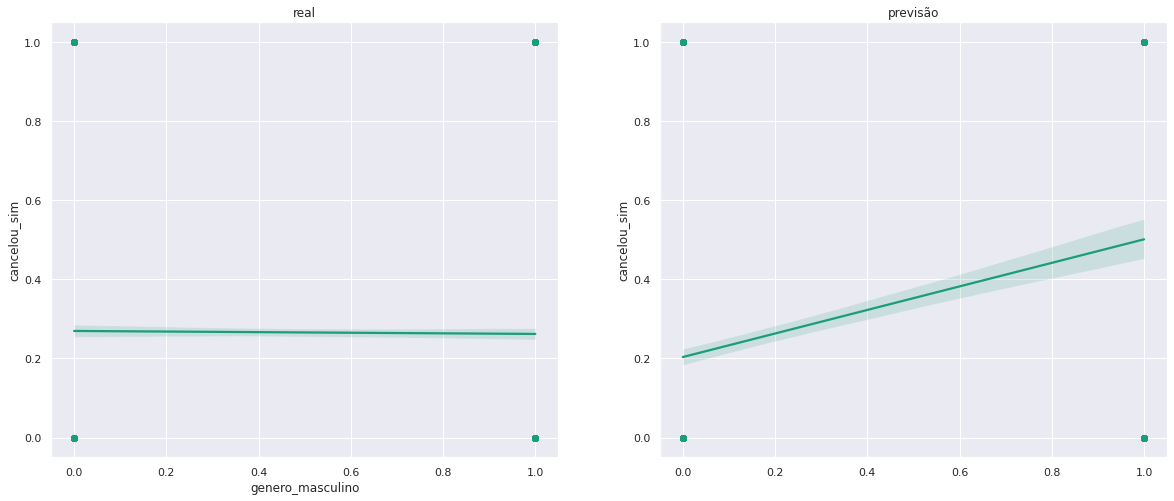

In [188]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
sns.set_theme(style="darkgrid", palette="Dark2")

ax1.set_title('real')
sns.regplot(x=dados_desbalanceado['genero_masculino'], y=dados_desbalanceado['cancelou_sim'], ax=ax1);

ax2.set_title('previsão')
sns.regplot(x=y_pred, y=y_test, ax=ax2);

Modelo Random Forest

In [191]:
n_trees=100
depth=5

rf = RandomForestClassifier(random_state=SEED, n_estimators=n_trees, max_depth=depth)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

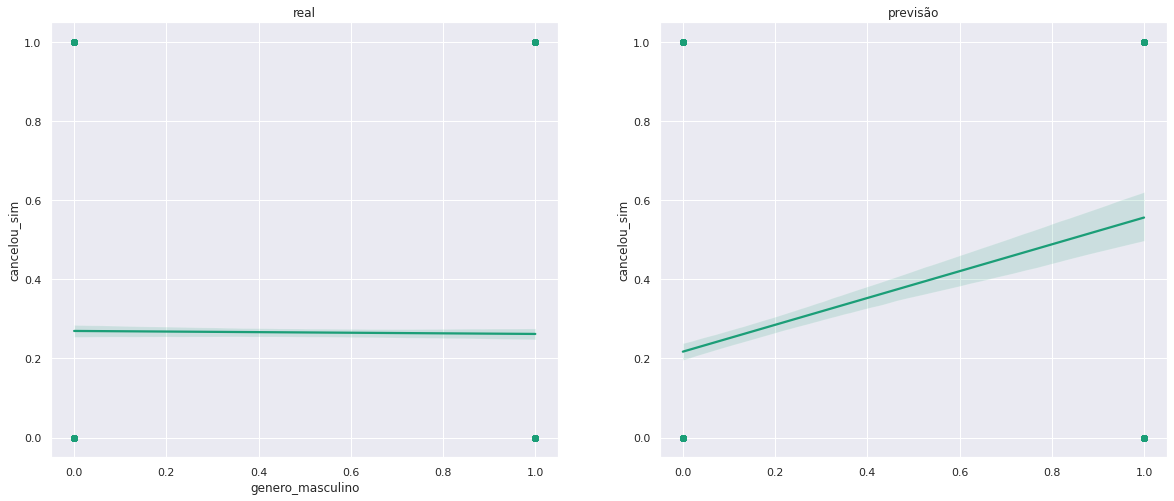

In [197]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
sns.set_theme(style="darkgrid", palette="Dark2")

ax1.set_title('real')
sns.regplot(x=dados_desbalanceado['genero_masculino'], y=dados_desbalanceado['cancelou_sim'], ax=ax1);

ax2.set_title('previsão')
sns.regplot(x=y_pred, y=y_test, ax=ax2);

Os dois modelos retornam resultados muito parecidos, mas a previsão do modelo Random Forest ficou mais alta que a previsão do modelo SVC.